In [1]:
# set up
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# get data
import RGC_Flicker
#from RGC_Flicker import get_flicker
reload(RGC_Flicker)
X_train, y_train, X_val, y_val, X_test, y_test = RGC_Flicker.get_flicker(num_classes=1)

In [2]:
# keras imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2, activity_l2, l1, activity_l1
from keras.optimizers import RMSprop
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
import time 

Using TensorFlow backend.


In [4]:
# sigmoid model setup and compilation
model_sig = Sequential()

stim_bin = 20
num_classes = 1
val_data = X_val, y_val

model_sig.add(Dense(output_dim=num_classes, input_dim=stim_bin, W_regularizer=l2(0.01)))
model_sig.add(Activation('sigmoid'))

model_sig.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])

Train on 37000 samples, validate on 5000 samples
Epoch 1/10
2s - loss: 0.6099 - mean_squared_error: 0.3179 - val_loss: 0.5325 - val_mean_squared_error: 0.2706
Epoch 2/10
2s - loss: 0.4999 - mean_squared_error: 0.2454 - val_loss: 0.4673 - val_mean_squared_error: 0.2387
Epoch 3/10
2s - loss: 0.4669 - mean_squared_error: 0.2253 - val_loss: 0.4400 - val_mean_squared_error: 0.2261
Epoch 4/10
2s - loss: 0.4562 - mean_squared_error: 0.2163 - val_loss: 0.4263 - val_mean_squared_error: 0.2195
Epoch 5/10
2s - loss: 0.4523 - mean_squared_error: 0.2113 - val_loss: 0.4188 - val_mean_squared_error: 0.2159
Epoch 6/10
2s - loss: 0.4508 - mean_squared_error: 0.2088 - val_loss: 0.4141 - val_mean_squared_error: 0.2134
Epoch 7/10
2s - loss: 0.4502 - mean_squared_error: 0.2068 - val_loss: 0.4115 - val_mean_squared_error: 0.2122
Epoch 8/10
2s - loss: 0.4500 - mean_squared_error: 0.2057 - val_loss: 0.4098 - val_mean_squared_error: 0.2116
Epoch 9/10
2s - loss: 0.4499 - mean_squared_error: 0.2053 - val_loss: 0

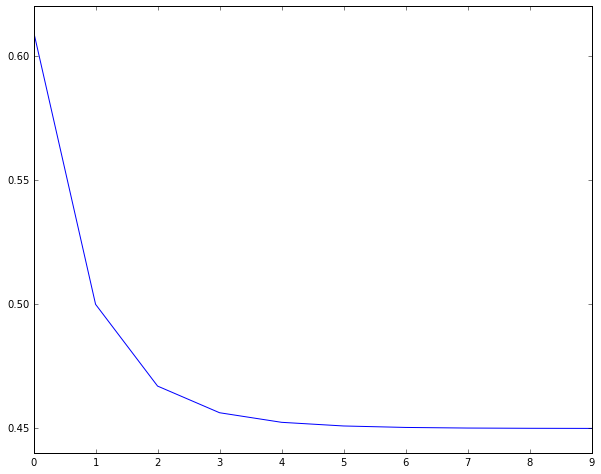

In [5]:
# exp model fitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2) # stop early if loss goes up for 2 epochs
hist_sig = model_sig.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=2, validation_data=val_data, callbacks=[early_stopping])
time.sleep(0.2)
loss_and_metrics_sig = model_sig.evaluate(X_test, y_test)

plt.plot(hist_sig.history['loss'])

In [6]:
# exp model results
print model_sig.metrics_names
print loss_and_metrics_sig
print -np.log(loss_and_metrics_sig[0]) * len(X_test)

['loss', 'mean_squared_error']
[0.39768135688418432, 0.19934647218953996]
9682.09415462


In [9]:
# model 2: relu model; setup and compilation 
model_relu = Sequential()

stim_bin = 20
num_classes = 1
val_data = X_val, y_val

model_relu.add(Dense(output_dim=num_classes, input_dim=stim_bin, W_regularizer=l2(0.01)))
model_relu.add(Activation('relu'))

model_relu.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])

Train on 37000 samples, validate on 5000 samples
Epoch 1/10
2s - loss: 0.5779 - mean_squared_error: 0.3447 - val_loss: 0.3455 - val_mean_squared_error: 0.1485
Epoch 2/10
2s - loss: 6.5982 - mean_squared_error: 68.2300 - val_loss: 7.4427 - val_mean_squared_error: 92.5676
Epoch 3/10
2s - loss: 7.2693 - mean_squared_error: 44.5038 - val_loss: 3.6182 - val_mean_squared_error: 15.9261
Epoch 4/10
2s - loss: 3.8369 - mean_squared_error: 7.5486 - val_loss: 2.4359 - val_mean_squared_error: 5.7108
10400/10500 [============================>.] - ETA: 0s

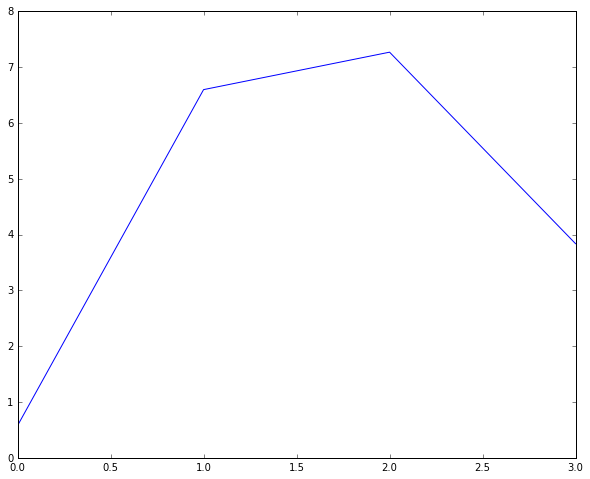

In [10]:
# relu model fitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2) # stop early if loss goes up for 2 epochs
hist_relu = model_relu.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=2, validation_data=val_data, callbacks=[early_stopping])
time.sleep(0.2)
loss_and_metrics_relu = model_relu.evaluate(X_test, y_test)

plt.plot(hist_relu.history['loss'])

In [11]:
# relu model results
print model_relu.metrics_names
print loss_and_metrics_relu
print -np.log(loss_and_metrics_relu[0]) * len(X_test)

['loss', 'mean_squared_error']
[2.3246027581351143, 5.5824612277802963]
-8857.26626112


In [12]:
# model 3: exp model; setup and compilation 
from keras import backend as K

def exp(x):
    return K.exp(x)

model_exp = Sequential()

stim_bin = 20
num_classes = 1
val_data = X_val, y_val

model_exp.add(Dense(output_dim=num_classes, input_dim=stim_bin, W_regularizer=l2(0.01)))
model_exp.add(Activation(exp))

model_exp.compile(loss='poisson', optimizer='SGD', metrics=['mean_squared_error'])

Train on 37000 samples, validate on 5000 samples
Epoch 1/10
2s - loss: 0.5899 - mean_squared_error: 0.3566 - val_loss: 0.4613 - val_mean_squared_error: 0.2256
Epoch 2/10
2s - loss: 0.4381 - mean_squared_error: 0.1949 - val_loss: 0.4023 - val_mean_squared_error: 0.1832
Epoch 3/10
2s - loss: 0.4159 - mean_squared_error: 0.1703 - val_loss: 0.3816 - val_mean_squared_error: 0.1675
Epoch 4/10
2s - loss: 0.4104 - mean_squared_error: 0.1613 - val_loss: 0.3727 - val_mean_squared_error: 0.1616
Epoch 5/10
2s - loss: 0.4087 - mean_squared_error: 0.1573 - val_loss: 0.3686 - val_mean_squared_error: 0.1600
Epoch 6/10
2s - loss: 0.4082 - mean_squared_error: 0.1559 - val_loss: 0.3658 - val_mean_squared_error: 0.1572
Epoch 7/10
2s - loss: 0.4080 - mean_squared_error: 0.1543 - val_loss: 0.3649 - val_mean_squared_error: 0.1576
Epoch 8/10
2s - loss: 0.4080 - mean_squared_error: 0.1538 - val_loss: 0.3644 - val_mean_squared_error: 0.1580
Epoch 9/10
2s - loss: 0.4080 - mean_squared_error: 0.1541 - val_loss: 0

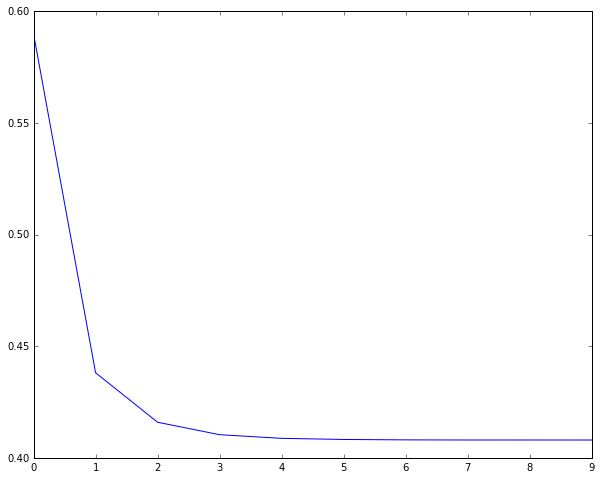

In [13]:
# exp model fitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2) # stop early if loss goes up for 2 epochs
hist_exp = model_exp.fit(X_train, y_train, nb_epoch=10, batch_size=32, verbose=2, validation_data=val_data, callbacks=[early_stopping])
time.sleep(0.2)
loss_and_metrics_exp = model_exp.evaluate(X_test, y_test)

plt.plot(hist_exp.history['loss'])

In [14]:
# exp model results
print model_exp.metrics_names
print loss_and_metrics_exp
print -np.log(loss_and_metrics_exp[0]) * len(X_test)

['loss', 'mean_squared_error']
[0.35469192870457966, 0.14737672770591009]
10883.3095637
